In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df =  pd.read_csv('titanic3.csv', sep = ";", encoding='utf8')

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

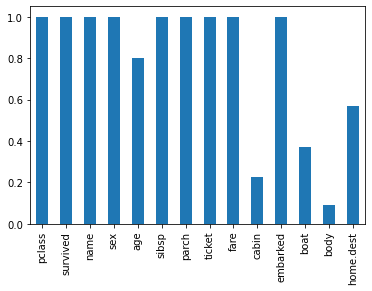

In [5]:
#Faça um gráfico com a porcentagem de dados ausentes em cada variável
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

In [6]:
#Remova as colunas com mais de 40% de dados ausentes
df.columns.tolist()
df.drop(columns=['cabin', 'boat', 'body', 'home.dest'], inplace = True)

In [7]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    return wrapper
df1 = df.assign(cabin_missing_age=add_indicator('age'))
df2 = df1.assign(cabin_missing_embarked=add_indicator('embarked'))

In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_2 =SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2['age'] = imp.fit_transform(df2[['age']])
df2['embarked'] = imp_2.fit_transform(df2[['embarked']])

In [9]:
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,cabin_missing_age,cabin_missing_embarked
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,0,0
1,1st,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,0,0
2,1st,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,0,0
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,0,0
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3rd,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,0,0
1305,3rd,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,1,0
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,0,0
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,0,0


In [10]:
df2.isnull().sum()

pclass                    0
survived                  0
name                      0
sex                       0
age                       0
sibsp                     0
parch                     0
ticket                    0
fare                      1
embarked                  0
cabin_missing_age         0
cabin_missing_embarked    0
dtype: int64

In [11]:
df2.dropna(inplace = True)

In [12]:
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,cabin_missing_age,cabin_missing_embarked
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,0,0
1,1st,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,0,0
2,1st,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,0,0
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,0,0
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3rd,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,0,0
1305,3rd,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,1,0
1306,3rd,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,0,0
1307,3rd,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,0,0


In [13]:
df2['pclass'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [14]:
size_mapping = {'1st': 0, '2nd': 1, '3rd': 3}
df2['pclass'] = df2['pclass'].map(size_mapping)

In [15]:
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,cabin_missing_age,cabin_missing_embarked
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,0,0
1,0,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,0,0
2,0,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,0,0
3,0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,0,0
4,0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,0,0
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,0,0


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['sex'] = le.fit_transform(df2['sex'].values)
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,cabin_missing_age,cabin_missing_embarked
0,0,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,S,0,0
1,0,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,S,0,0
2,0,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,S,0,0
3,0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,S,0,0
4,0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,C,0,0
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,C,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,C,0,0
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,C,0,0


In [18]:
df3 = pd.get_dummies(df2[['embarked']], drop_first=True)

In [19]:
df3

,embarked_Q,embarked_S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


In [22]:
df4 = pd.concat([df2, df3], axis = 1)

In [23]:
df4

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,cabin_missing_age,cabin_missing_embarked,embarked_Q,embarked_S
0,0,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,S,0,0,0,1
1,0,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,S,0,0,0,1
2,0,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,S,0,0,0,1
3,0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,S,0,0,0,1
4,0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,C,0,0,0,0
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,C,1,0,0,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,C,0,0,0,0
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,C,0,0,0,0
